In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016 (1).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales_as_at_22_Dec_2016.csv']))

In [ ]:
df.head()
df.shape

(16719, 16)

In [ ]:
df=df.dropna(axis=0)
df.shape

(6825, 16)

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [ ]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating']

In [ ]:
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,41.0,6.6,129.0,E


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


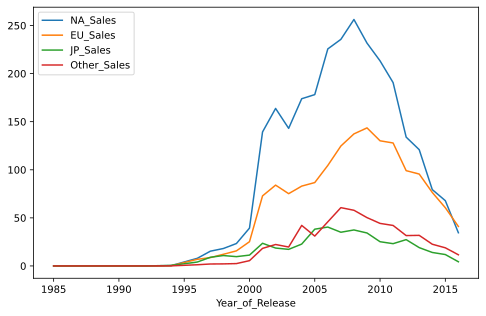

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

df.groupby('Year_of_Release')['NA_Sales','EU_Sales','JP_Sales','Other_Sales',].sum().plot.line()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


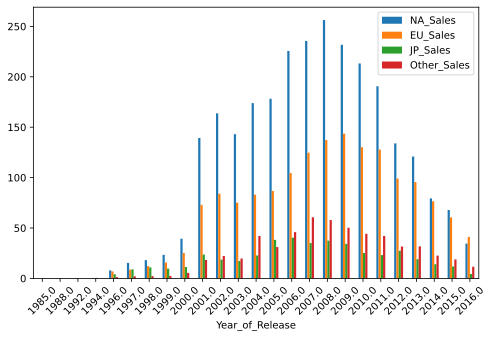

In [ ]:
df.groupby('Year_of_Release')['NA_Sales','EU_Sales','JP_Sales','Other_Sales',].sum().plot(kind='bar', rot=45)

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
                

In [ ]:
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


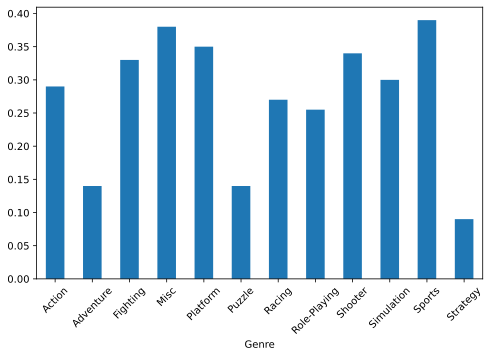

In [ ]:
df.groupby('Genre')['Global_Sales'].median().plot(kind='bar',rot=45)

временные ряды

In [ ]:
import numpy as np
data=pd.DataFrame(columns=['Date','Price'])
data['Date']=pd.date_range('1/1/2019','12,28,2021',freq='D')
data['Price']=np.random.normal(500,600,1066)

In [ ]:
data['Price']=data.Price.apply(lambda x: int(x))


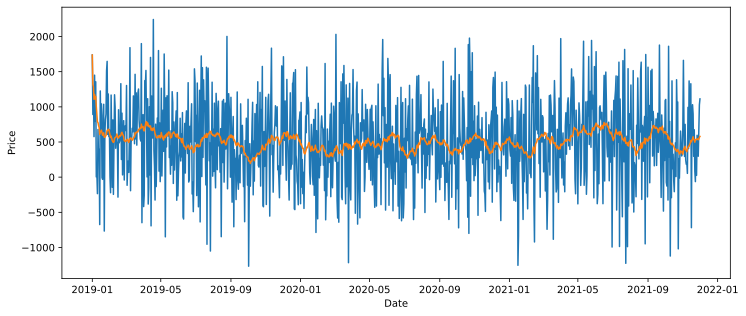

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x=data['Date'],y=data['Price'])
sns.lineplot(x=data['Date'],y=data['Price'].rolling(30,min_periods=1).mean())

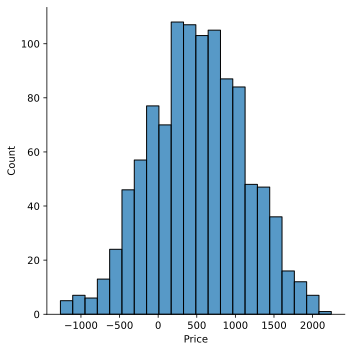

In [ ]:
sns.displot(data['Price'])

In [ ]:
uploaded = files.upload()

Saving coin_Bitcoin.csv to coin_Bitcoin.csv


In [ ]:
bit = pd.read_csv(io.BytesIO(uploaded['coin_Bitcoin.csv']),parse_dates=['Date'])

In [ ]:
bit.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [ ]:
bit=bit.drop(['SNo','Name','Symbol'],axis=1)

In [ ]:
bit.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


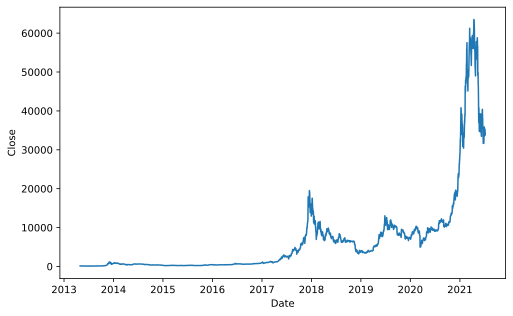

In [ ]:
sns.lineplot(x=bit['Date'],y=bit['Close'])


In [ ]:
print(bit[['Date','Close']].head(3))
print(bit[['Date','Close']].tail(3))

                 Date       Close
0 2013-04-29 23:59:59  144.539993
1 2013-04-30 23:59:59  139.000000
2 2013-05-01 23:59:59  116.989998
                    Date         Close
2988 2021-07-04 23:59:59  35287.779766
2989 2021-07-05 23:59:59  33746.002456
2990 2021-07-06 23:59:59  34235.193451


In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dftest = adfuller(bit['Date'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput) 

TypeError: ignored